### **Extract patches from normal images**

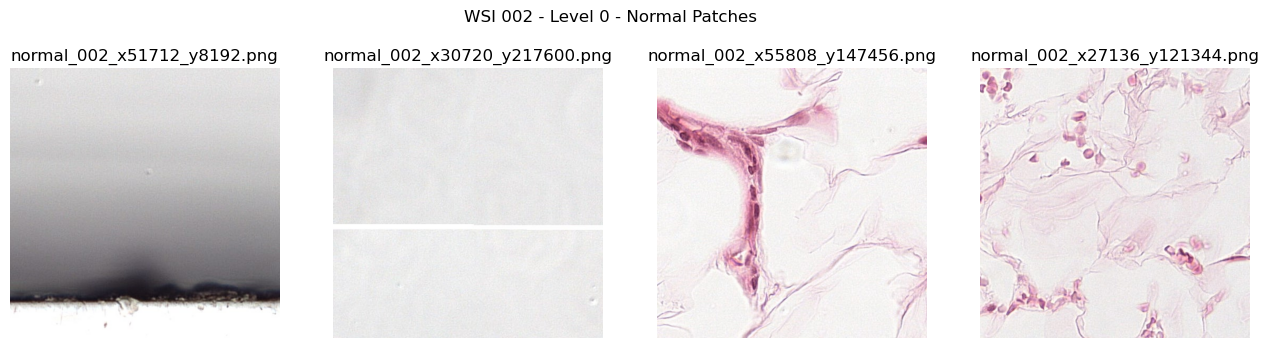

In [1]:
# Show patches for a specific WSI
import random
from PIL import Image
import matplotlib.pyplot as plt
import os
def show_patches(idx, num_patches=4, level=0, type="normal"):
    """
    Show randomly selected patches from a specific WSI in the dataset.
    Parameters:
        idx (int): Index of the WSI in the dataset (e.g., 2 for normal_002).
        num_patches (int): Number of patches to display.
        level (int): Level of the WSI to extract patches from.
        type (str): Type of patches to extract ("normal" or "tumor").
    """

    patches_dir = os.path.join(os.getcwd(), "..", "data", "camelyon16", "patches")
    level_dir = os.path.join(patches_dir, f"level_{level}", type)
    if not os.path.exists(level_dir):
        print(f"[INFO] Level directory {level_dir} does not exist.")
        return

    # Find all patches for the given WSI index
    prefix = f"{type}_{idx:03d}_"
    patch_files = [f for f in os.listdir(level_dir) if f.startswith(prefix) and f.endswith(".png")]
    if not patch_files:
        print(f"[INFO] No patches found for {prefix} in {level_dir}.")
        return

    selected_patches = random.sample(patch_files, min(num_patches, len(patch_files)))
    plt.figure(figsize=(4 * num_patches, 4))
    for i, patch_file in enumerate(selected_patches):
        patch_path = os.path.join(level_dir, patch_file)
        patch = Image.open(patch_path)
        plt.subplot(1, num_patches, i + 1)
        plt.imshow(patch)
        plt.axis("off")
        plt.title(patch_file)
    plt.suptitle(f"WSI {idx:03d} - Level {level} - {type.capitalize()} Patches")
    plt.show()
image_dir = os.path.join(os.getcwd(), "..", "data", "camelyon16", "train", "img")
show_patches(idx=2, num_patches=4, level=0, type="normal")

In [ ]:
# Level 0 patch size and WSI dimensions.The WSI dimensions are 97792 x 221184 pixels.
width = 97792
height = 221184
patch_size = 1792

num_patches_x = width // patch_size
num_patches_y = height // patch_size

covered_width = num_patches_x * patch_size
covered_height = num_patches_y * patch_size

lost_width = width - covered_width
lost_height = height - covered_height 

print(f"Total patches in level 0: {num_patches_x * num_patches_y}")
print(f"Lost width: {lost_width} pixels, Lost height: {lost_height} pixels")
print(f"Percentage of lost area: {((lost_width * height) + (lost_height * width)) / (width * height) * 100:.2f}%")


Total patches in level 0: 6642
Lost width: 1024 pixels, Lost height: 768 pixels
Percentage of lost area: 1.39%


----------> so: no padding needed